### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

BoomBikes, a US bike-sharing company, is facing significant revenue decline due to the COVID-19 pandemic. To recover and thrive post-pandemic, they aim to understand and predict the demand for shared bikes in the American market.

#### Objective:

1. Identify key factors influencing bike-sharing demand.
2. Build a predictive model to estimate bike demand based on these factors.

### Import Necessary Libraries

In [429]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Extra - To Suppress warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing statsmodels
import statsmodels.api as sm

# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Bike Sharing dataset

In [430]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [431]:
# Get shape of the dataset
bike.shape

(730, 16)

In [432]:
# Show info of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [433]:
# Describe of the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Finding
This dataset have 730 rows and 16 columns.

One column has 'object' datatype and others have either 'int64' or 'float64' datatypes.

Some variables are categorical in nature.

### Data Quality Check

Check for NULL/Missing values

In [434]:
# Check for missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#####  Check for duplicate rows in dateset

In [435]:
round((bike.isnull().sum(axis=1)/len(bike))*100, 2).sort_values(ascending = False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

Bike dataset don't have any null/missing values in rows/columns

### Data Cleaning and Preparation

Checking value_counts() for the dataset to identify if any column have junk/unknown values. If any column have junk/unknown values then we have to drop these columns.

In [436]:
bike_dummy = bike.iloc[:, 1:16]
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=True), '\n\n')

01-01-2018    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
30-04-2019    1
             ..
04-09-2018    1
05-09-2018    1
06-09-2018    1
08-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 


4    178
1    180
2    184
3    188
Name: season, dtype: int64 


0    365
1    365
Name: yr, dtype: int64 


2     56
4     60
6     60
9     60
11    60
1     62
3     62
5     62
7     62
8     62
10    62
12    62
Name: mnth, dtype: int64 


1     21
0    709
Name: holiday, dtype: int64 


3    103
2    104
4    104
5    104
6    105
0    105
1    105
Name: weekday, dtype: int64 


0    231
1    499
Name: workingday, dtype: int64 


3     21
2    246
1    463
Name: weathersit, dtype: int64 


14.110847    1
15.033347    1
11.445847    1
16.707500    1
18.620847    1
            ..
19.850847    4
26.615847    4
23.130847    4
10.899153    5
26.035000    5
Name: temp, Length: 498, dtype: int64 


18.18125    1
28.69375    1
30.74625    1
29.92435    1
22.85190    1
   

After analysis using value_counts() method we have found that there is not any junk/unknown values in any coulmns of the dataset.

#### Removing unknown and redundent columns

1. **instant**: This column is a index column of the dataset.

2. **dteday**: This is the date column but we already have 'yr', 'mnth' coulmns. So we can drop this column.

3. **casual & registered**: After analysing data dictionary, we can understand that this two columns don't have any role because we need to find total count of the bikes and not by specific category.

In [437]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [438]:
# Drop 'instant' from the bike dataframe.
bike = bike.drop('instant', axis = 1)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [439]:
# Drop 'dteday' from the bike dataframe.
bike = bike.drop('dteday', axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [440]:
# Drop 'casual' from the bike dataframe.
bike = bike.drop('casual', axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1518,1600


In [441]:
# Drop 'registered' from the bike dataframe.
bike = bike.drop('registered', axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [442]:
# Converte categorical columns into 'category' datatype
bike['season'] = bike['season'].astype('category')
bike['mnth'] = bike['mnth'].astype('category')
bike['weekday'] = bike['weekday'].astype('category')
bike['weathersit'] = bike['weathersit'].astype('category')

In [443]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [444]:
# Converting 'season''s values into categorical string values
bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [445]:
# Converting 'weathersit''s values into categorical string values
bike['weathersit'] = bike['weathersit'].map({1:'mixed clouds', 2:'misty', 3:'light precipitation', 4:'heavy precipitation'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,mixed clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,mixed clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,mixed clouds,9.305237,11.46350,43.6957,12.522300,1600


### Univariate Analysis

Season status
Spring Season: 24.65753424657534
Summer Season: 25.205479452054796
Fall Season: 25.753424657534246
Winter Season: 24.383561643835616


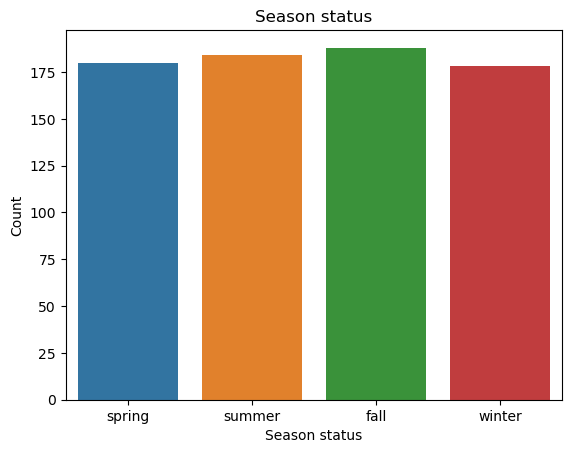

In [446]:
# Season status
print("Season status")
print(f"Spring Season: {len(bike[bike['season'] == 'spring'])/len(bike['season'])*100}")
print(f"Summer Season: {len(bike[bike['season'] == 'summer'])/len(bike['season'])*100}")
print(f"Fall Season: {len(bike[bike['season'] == 'fall'])/len(bike['season'])*100}")
print(f"Winter Season: {len(bike[bike['season'] == 'winter'])/len(bike['season'])*100}")

season = sns.countplot(x = 'season', data = bike)
season.set_title('Season status')
season.set_xlabel('Season status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that season data are almost equaly distributed in "Spring", "Summer", "Fall" and "Winter" seasons.

Year status
Year 2018: 50.0
Year 2019: 50.0


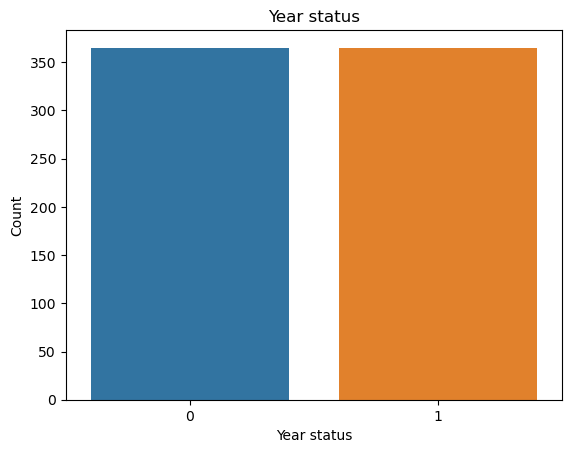

In [447]:
# Year status
print("Year status")
print(f"Year 2018: {len(bike[bike['yr'] == 0])/len(bike['yr'])*100}")
print(f"Year 2019: {len(bike[bike['yr'] == 1])/len(bike['yr'])*100}")

season = sns.countplot(x = 'yr', data = bike)
season.set_title('Year status')
season.set_xlabel('Year status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that year data are equaly distributed in 2018 and 2019.

Month status
Month 1: 8.493150684931507
Month 2: 7.671232876712329
Month 3: 8.493150684931507
Month 4: 8.21917808219178
Month 5: 8.493150684931507
Month 6: 8.21917808219178
Month 7: 8.493150684931507
Month 8: 8.493150684931507
Month 9: 8.21917808219178
Month 10: 8.493150684931507
Month 11: 8.21917808219178
Month 12: 8.493150684931507


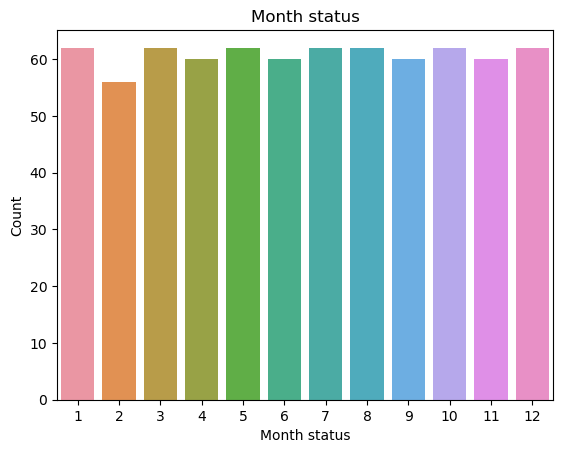

In [448]:
# Month status
print("Month status")
months = bike['mnth'].unique()
months = sorted(months)
for month in months:
    print(f"Month {month}: {len(bike[bike['mnth'] == month])/len(bike['mnth'])*100}")

season = sns.countplot(x = 'mnth', data = bike)
season.set_title('Month status')
season.set_xlabel('Month status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bike uses frequancies is almost same in all months except Feburary month. In Feburary month bike uses is lower than other months. 

Holiday status
No Holiday: 97.12328767123287
Holiday: 2.8767123287671232


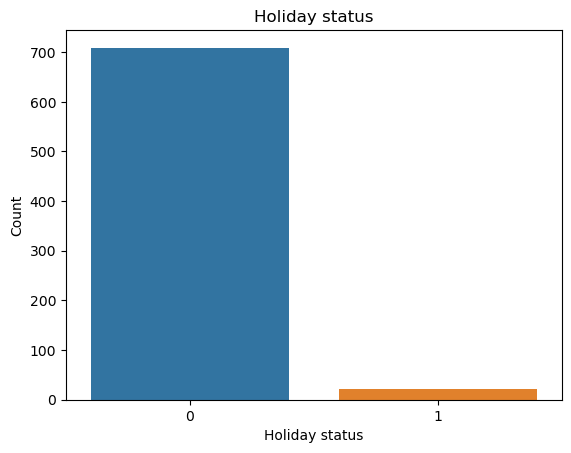

In [449]:
# Holiday status
print("Holiday status")
print(f"No Holiday: {len(bike[bike['holiday'] == 0])/len(bike['holiday'])*100}")
print(f"Holiday: {len(bike[bike['holiday'] == 1])/len(bike['holiday'])*100}")

season = sns.countplot(x = 'holiday', data = bike)
season.set_title('Holiday status')
season.set_xlabel('Holiday status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bike uses is maximum (97.12%) when there is no holiday but bike uses is minimum(2.87%) when there is holiday.

Weekday status
Weekday 0: 14.383561643835616
Weekday 1: 14.383561643835616
Weekday 2: 14.246575342465754
Weekday 3: 14.10958904109589
Weekday 4: 14.246575342465754
Weekday 5: 14.246575342465754
Weekday 6: 14.383561643835616


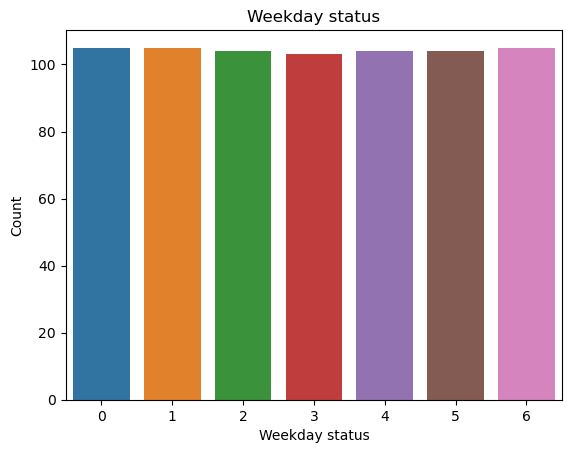

In [450]:
# Weekday status
print("Weekday status")
weekdays = bike['weekday'].unique()
weekdays = sorted(weekdays)
for weekday in weekdays:
    print(f"Weekday {weekday}: {len(bike[bike['weekday'] == weekday])/len(bike['weekday'])*100}")

season = sns.countplot(x = 'weekday', data = bike)
season.set_title('Weekday status')
season.set_xlabel('Weekday status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bike uses on every weekday are simillar approx(14%).

Workingday status
Workingday 0: 31.643835616438352
Workingday 1: 68.35616438356165


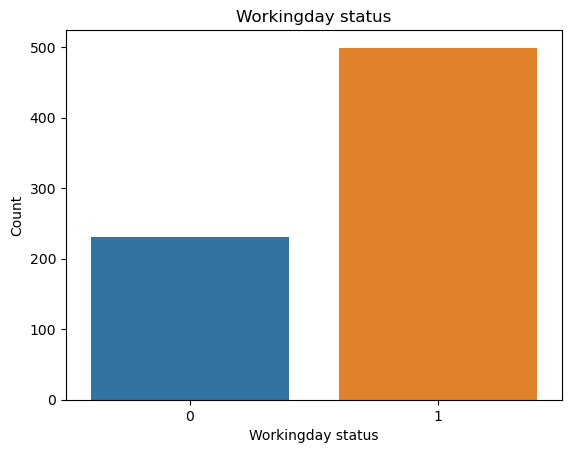

In [451]:
# Workingday status
print("Workingday status")
workingdays = bike['workingday'].unique()
workingdays = sorted(workingdays)
for workingday in workingdays:
    print(f"Workingday {workingday}: {len(bike[bike['workingday'] == workingday])/len(bike['workingday'])*100}")

season = sns.countplot(x = 'workingday', data = bike)
season.set_title('Workingday status')
season.set_xlabel('Workingday status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bike uses on working day is almost double(68%) than non-working days(31%).

Weathersit status
Weathersit light precipitation: 2.8767123287671232
Weathersit misty: 33.6986301369863
Weathersit mixed clouds: 63.42465753424658


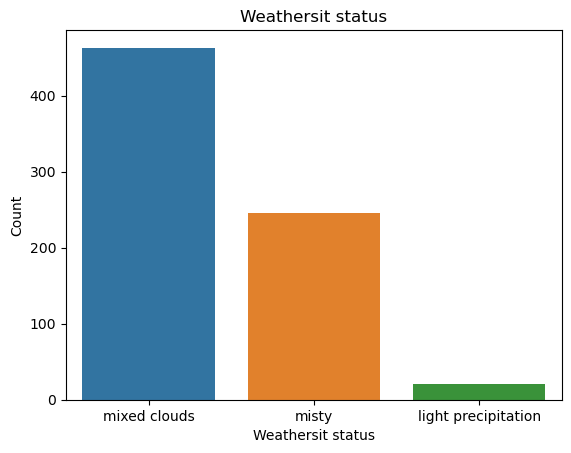

In [452]:
# weathersit status
print("Weathersit status")
weathersits = bike['weathersit'].unique()
weathersits = sorted(weathersits)
for weathersit in weathersits:
    print(f"Weathersit {weathersit}: {len(bike[bike['weathersit'] == weathersit])/len(bike['weathersit'])*100}")

season = sns.countplot(x = 'weathersit', data = bike)
season.set_title('Weathersit status')
season.set_xlabel('Weathersit status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bikes are in used when weather condition was either "mixed clouds" or "misty".

Temp status


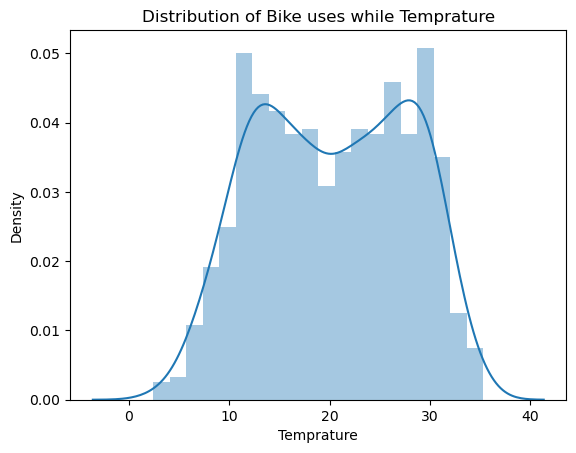

In [453]:
# Temp status
print("Temp status")
ls = sns.distplot(bike['temp'], kde=True, bins=20)
ls.set_title('Distribution of Bike uses while Temprature')
ls.set_xlabel('Temprature')
ls.set_ylabel('Density')
plt.show()

##### Analysis shows that bikes are mostly in used when temprature was between 10 to 30.

Feeling Temprature status


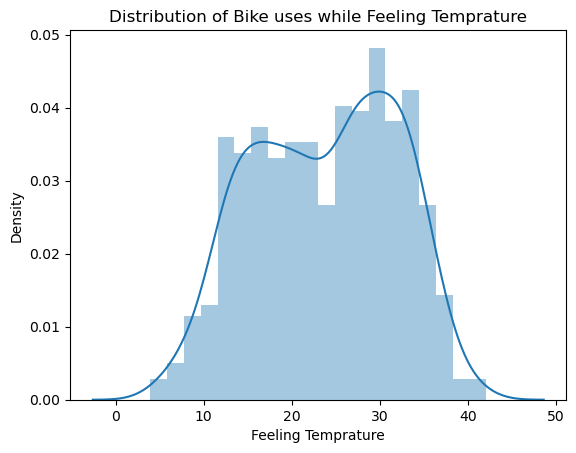

In [454]:
# Feeling Temprature status
print("Feeling Temprature status")
ls = sns.distplot(bike['atemp'], kde=True, bins=20)
ls.set_title('Distribution of Bike uses while Feeling Temprature')
ls.set_xlabel('Feeling Temprature')
ls.set_ylabel('Density')
plt.show()

##### Analysis shows that bikes are mostly in used when feeling temprature in Celsius was between 15 to 35.

Humidity status


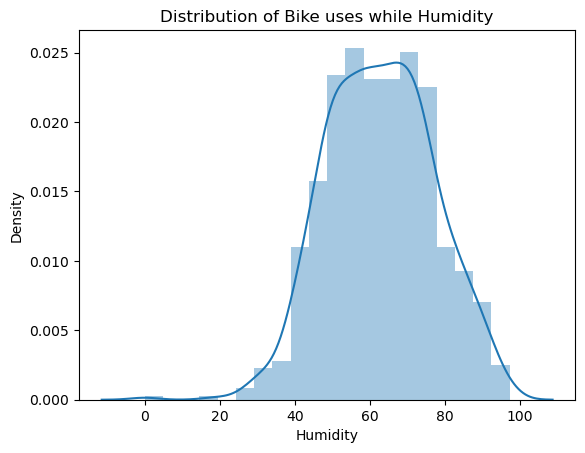

In [455]:
# Humidity status
print("Humidity status")
ls = sns.distplot(bike['hum'], kde=True, bins=20)
ls.set_title('Distribution of Bike uses while Humidity')
ls.set_xlabel('Humidity')
ls.set_ylabel('Density')
plt.show()

##### Analysis shows that bikes are mostly in used when humidity was between 40 to 85.


Windspeed status


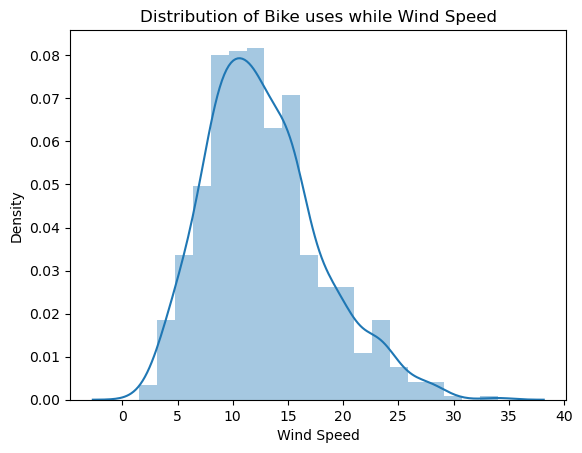

In [456]:
# Windspeed status
print("Windspeed status")
ls = sns.distplot(bike['windspeed'], kde=True, bins=20)
ls.set_title('Distribution of Bike uses while Wind Speed')
ls.set_xlabel('Wind Speed')
ls.set_ylabel('Density')
plt.show()

##### Analysis shows that bikes are mostly in used when wind speed was between 5 to 20.

## Bivariate Analysis

In this part of Analysis, lets find out if there is a relationship between two sets of values.
We will do bivariate analysis of each of independent variables(season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed) with dependent variable **cnt** (count of total rental bikes including both casual and registered).

### Bivariate Analysis of Season against count of total rental bikes

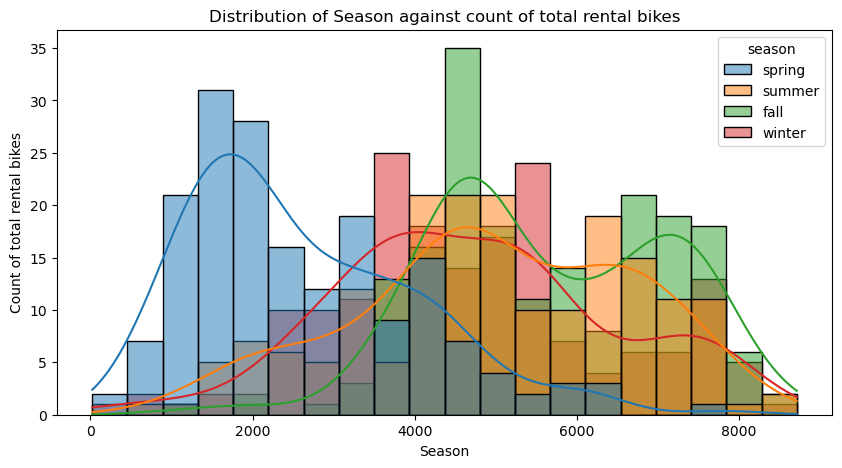

In [457]:
# Distribution of Season against count of total rental bikes
plt.figure(figsize=(10,5))
sns.histplot(data=bike, x='cnt', hue='season',  kde=True, bins=20)
plt.title('Distribution of Season against count of total rental bikes')
plt.xlabel('Season')
plt.ylabel('Count of total rental bikes')
plt.show()

<Figure size 1000x500 with 0 Axes>

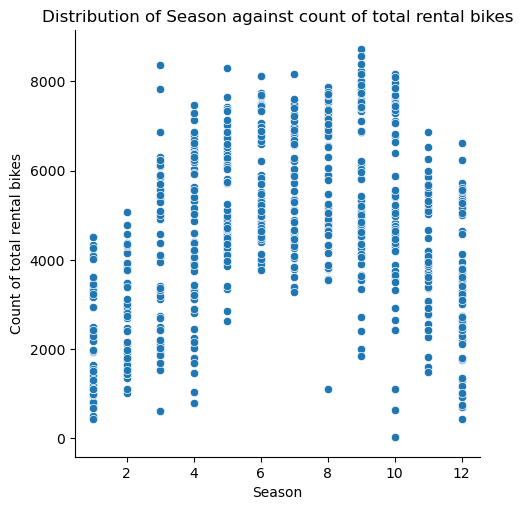

In [458]:
# Distribution of Season against count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike, x="mnth", y="cnt")
plt.title('Distribution of Season against count of total rental bikes')
plt.xlabel('Season')
plt.ylabel('Count of total rental bikes')
plt.show()

<Figure size 1000x500 with 0 Axes>

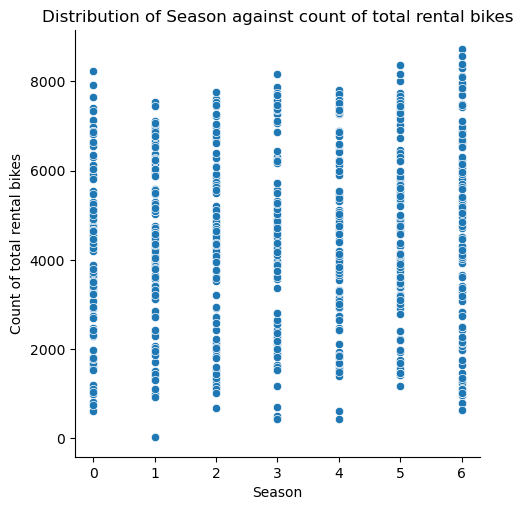

In [459]:
# Distribution of Season against count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike, x="weekday", y="cnt")
plt.title('Distribution of Season against count of total rental bikes')
plt.xlabel('Season')
plt.ylabel('Count of total rental bikes')
plt.show()

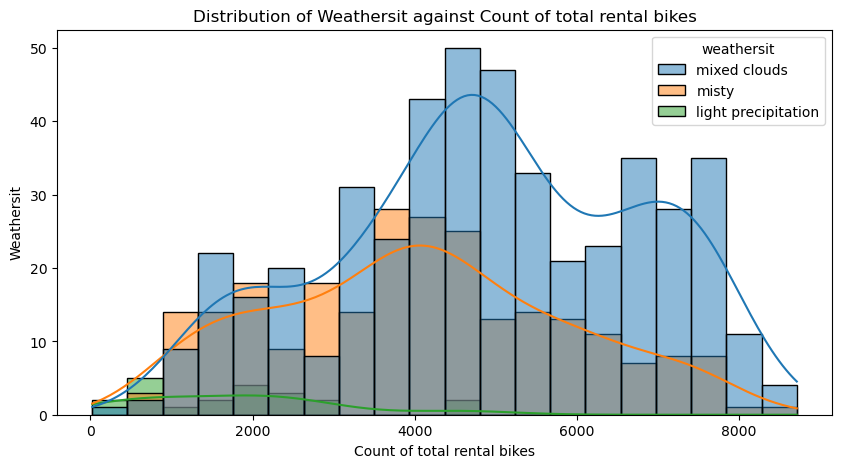

In [460]:
# Distribution of Weathersit against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.histplot(data=bike, x='cnt', hue='weathersit',  kde=True, bins=20)
plt.title('Distribution of Weathersit against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Weathersit')
plt.show()

<Figure size 1000x500 with 0 Axes>

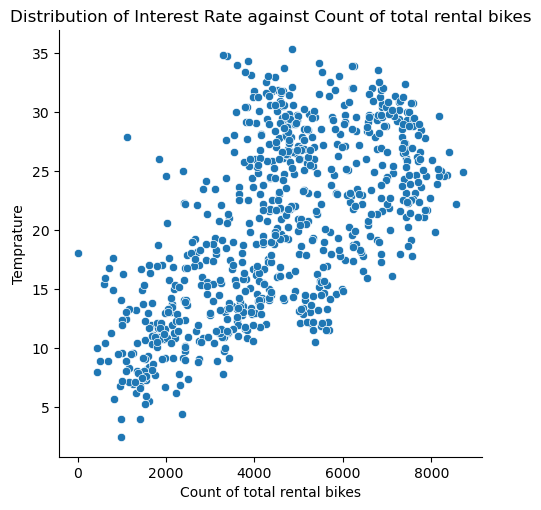

In [461]:
# Distribution of Temprature against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike, x='cnt', y='temp')
plt.title('Distribution of Interest Rate against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Temprature')
plt.show()

<Figure size 1000x500 with 0 Axes>

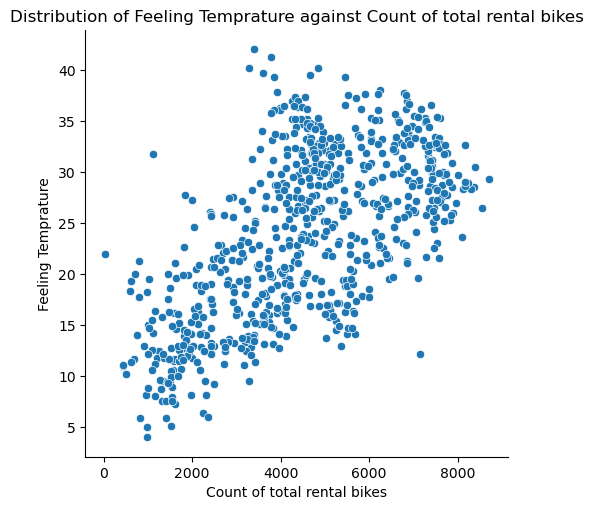

In [462]:
# Distribution of Feeling Temprature against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike, x='cnt', y='atemp')
plt.title('Distribution of Feeling Temprature against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Feeling Temprature')
plt.show()

<Figure size 1000x500 with 0 Axes>

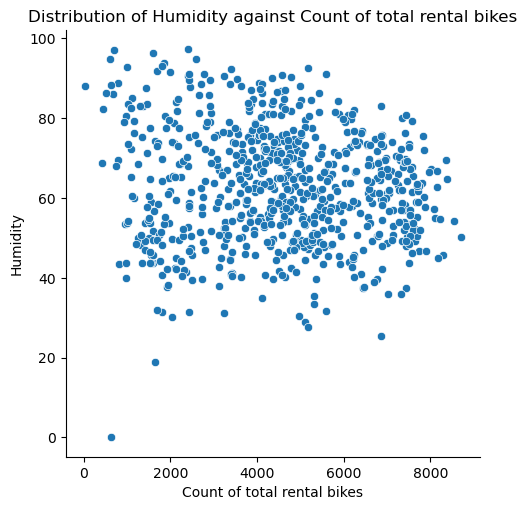

In [463]:

# Distribution of Humidity against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike, x='cnt', y='hum')
plt.title('Distribution of Humidity against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Humidity')
plt.show()

<Figure size 1000x500 with 0 Axes>

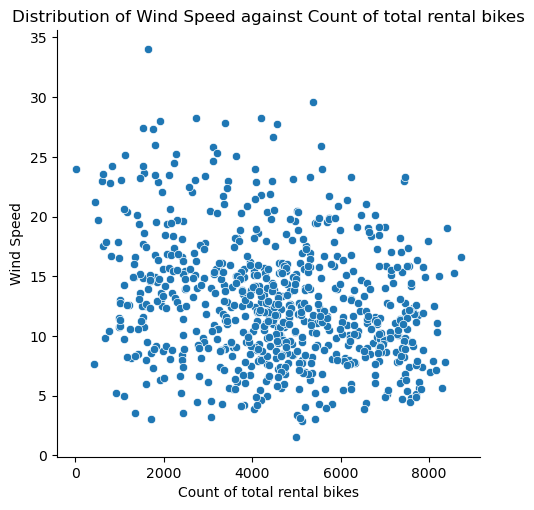

In [464]:

# Distribution of Wind Speed against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike, x='cnt', y='windspeed')
plt.title('Distribution of Wind Speed against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Wind Speed')
plt.show()

### Visualising the Data

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 5000x5000 with 0 Axes>

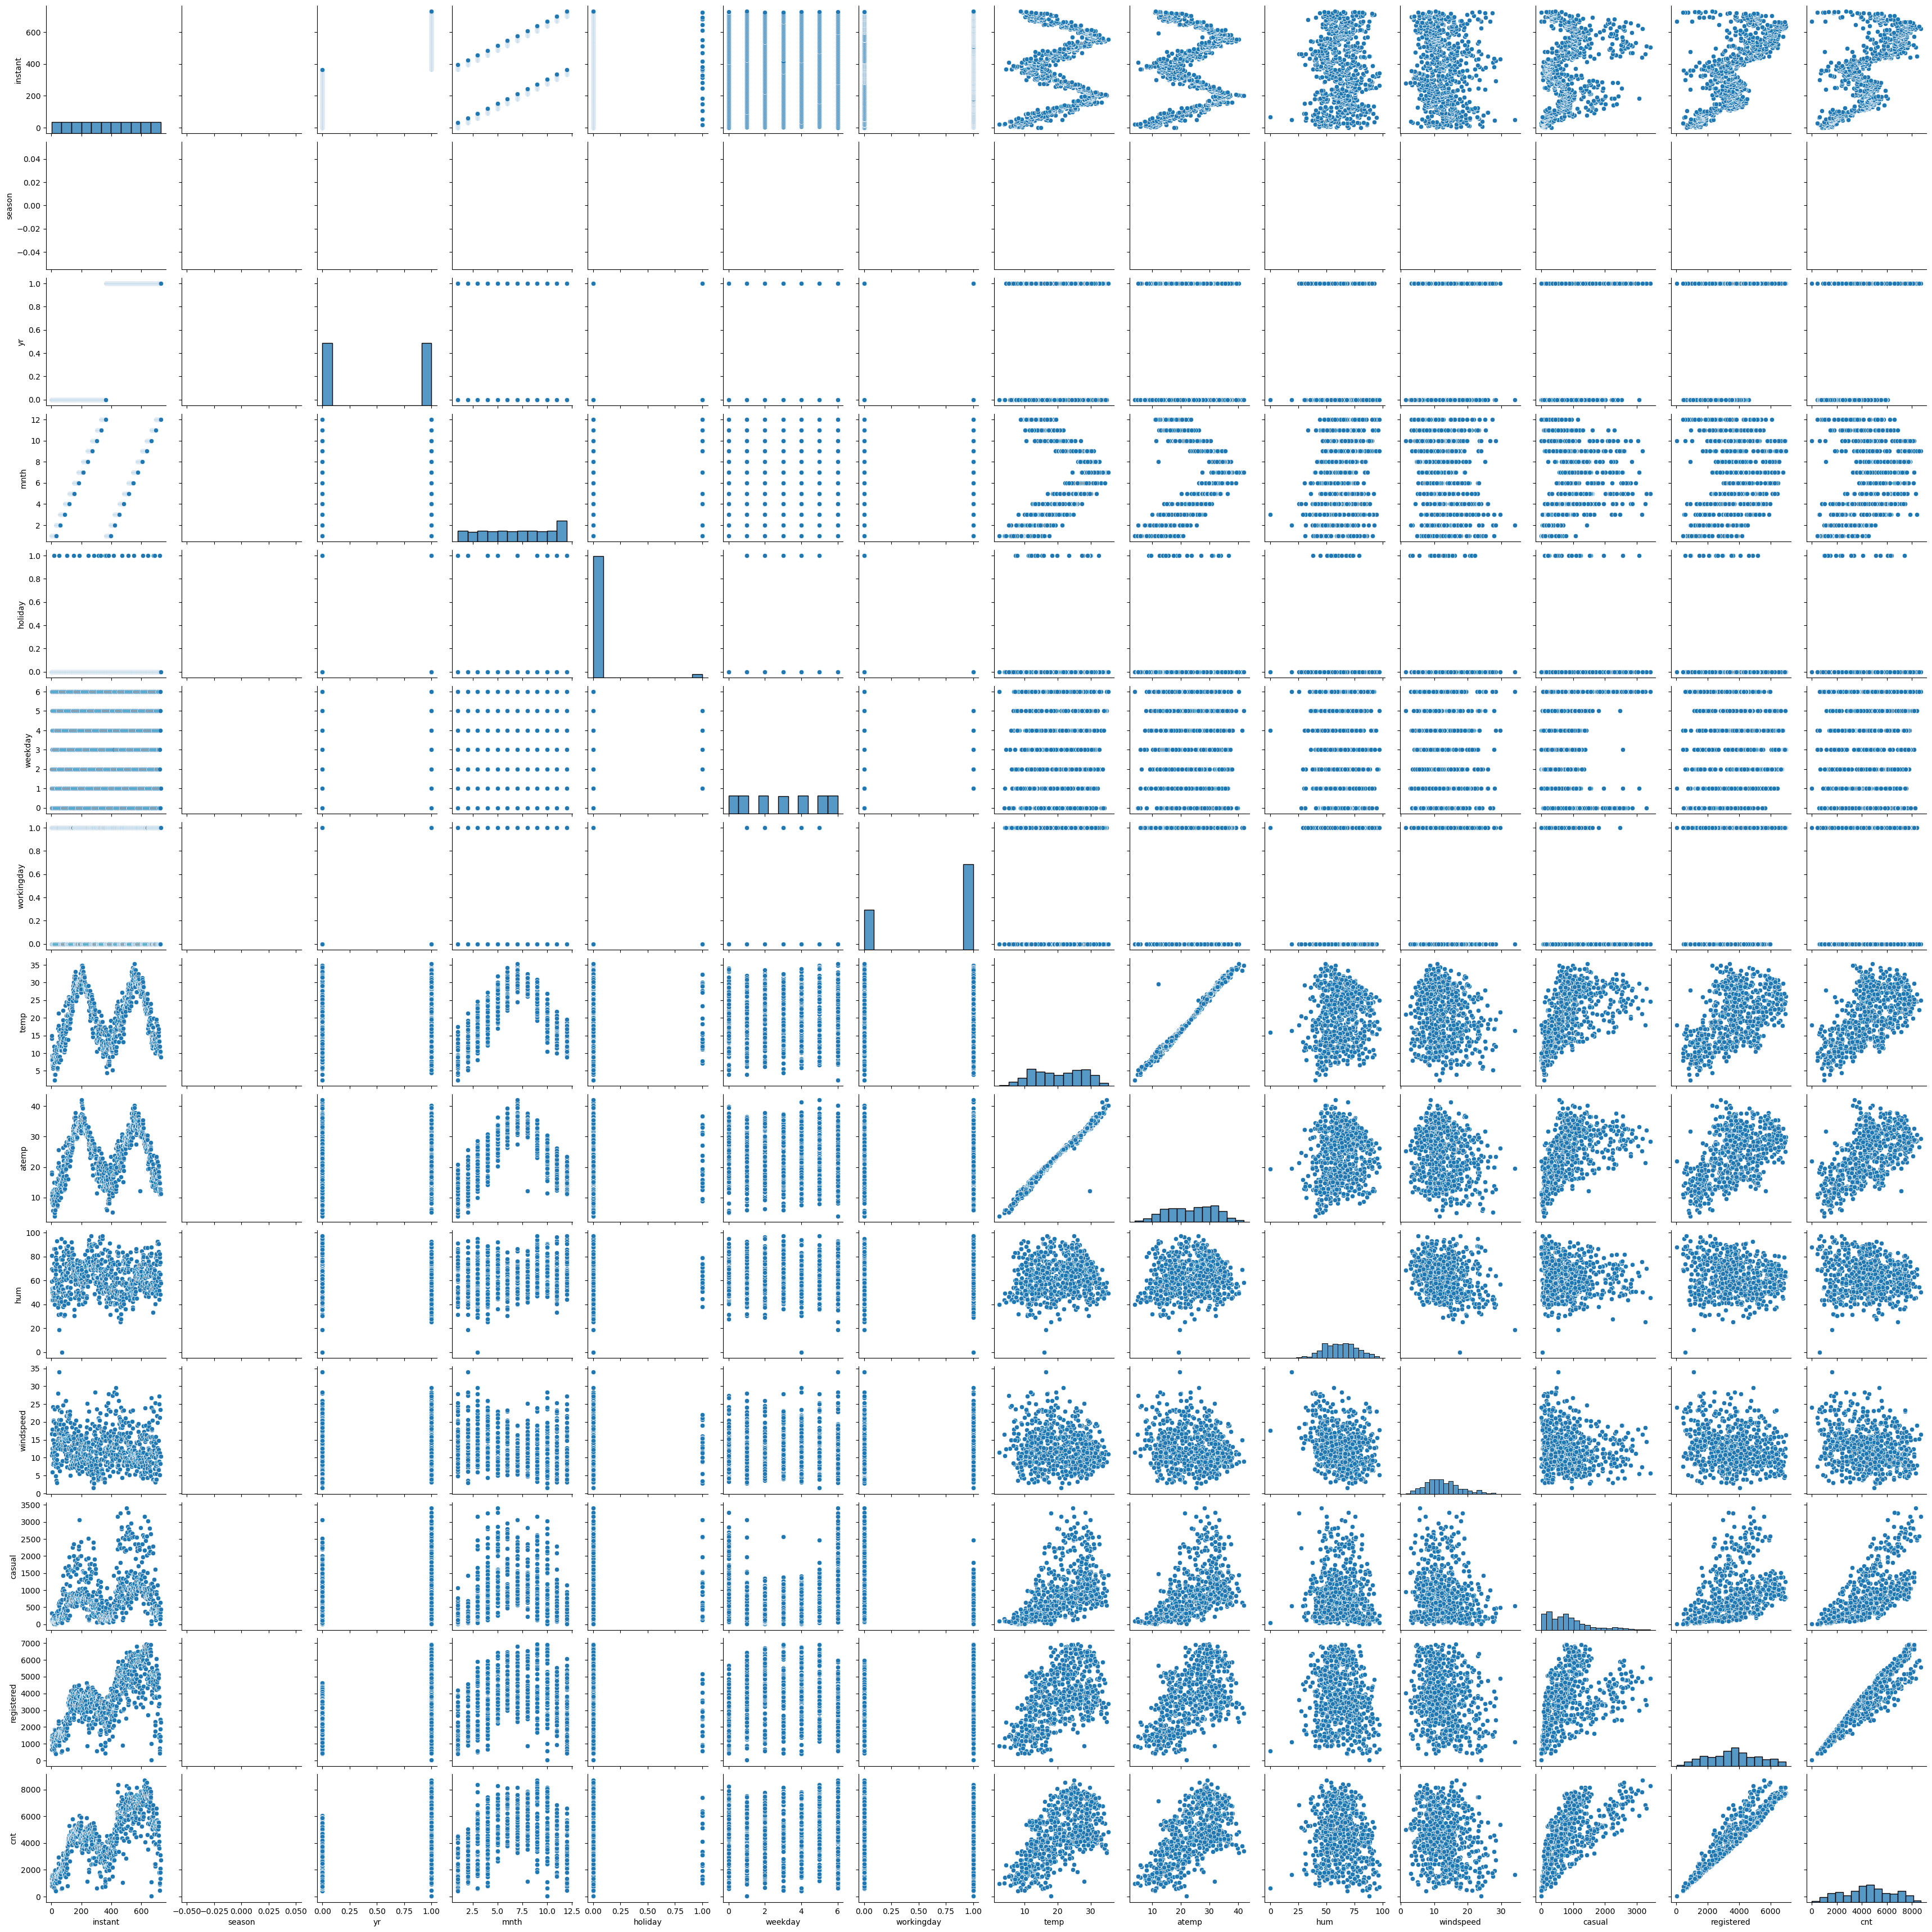

In [465]:
# Visualising the numrical variables
plt.figure(figsize = (50, 50))
sns.pairplot(df_bike)

plt.savefig("pairplot.png")
plt.show()
plt.close()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

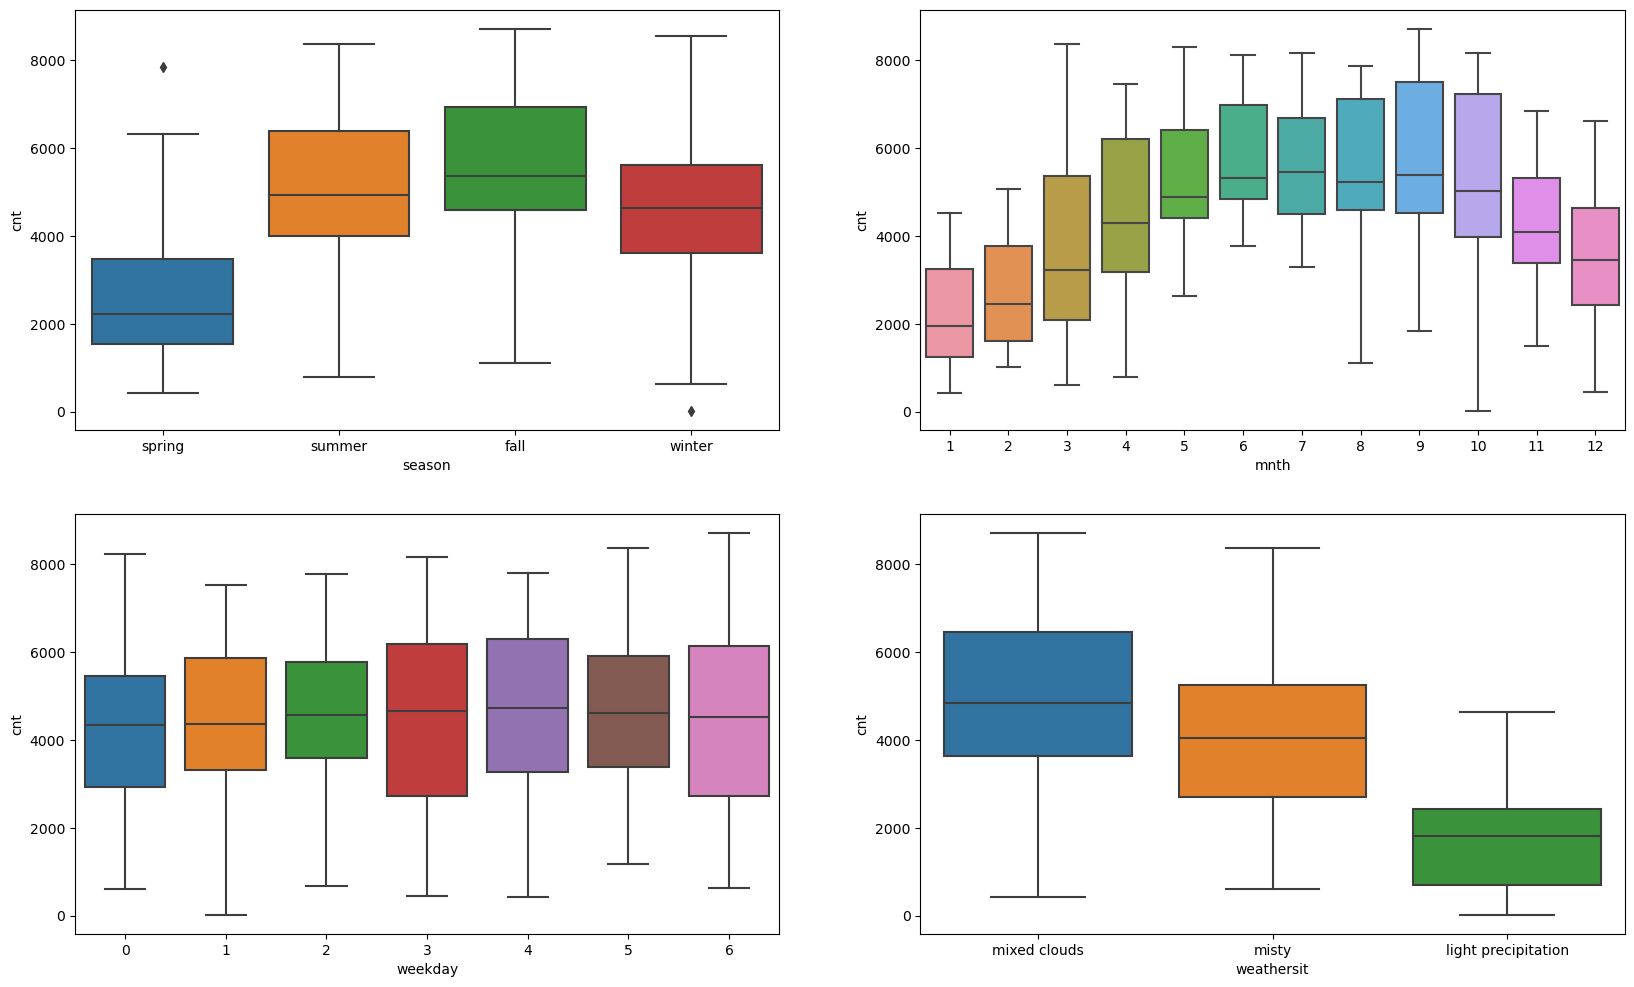

In [466]:
# visualising the categorical variables
plt.figure(figsize = (20, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(2, 2, 2)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.subplot(2, 2, 3)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.subplot(2, 2, 4)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.show()

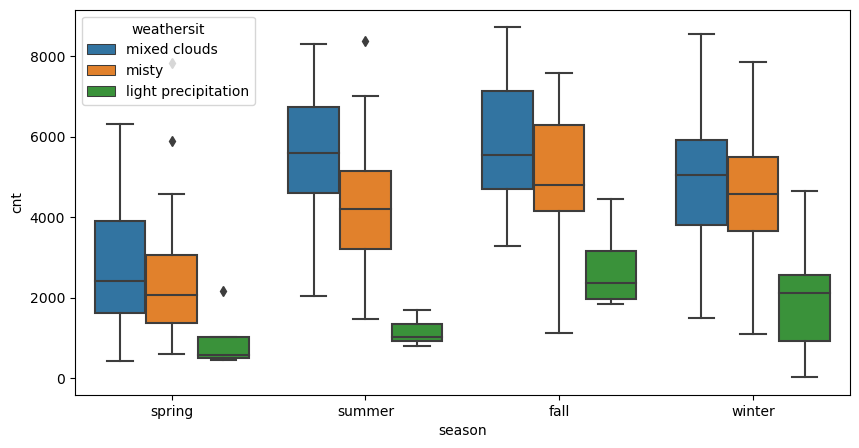

In [467]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bike)
plt.show()

## Step 3: Data Preparation

- We can see that our dataset has some columns with values as string values.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

### Dummy Variables

#### Dummy variables for 'weathersit'

The variable `season` has four levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [468]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
season_dummies = pd.get_dummies(bike['season'])

In [469]:
season_dummies.head()

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


Now, you don't need four columns. You can drop the `season` column, as the seasons can be identified with just the last three columns where — 
- `000` will correspond to `spring`
- `001` will correspond to `summer`
- `010` will correspond to `fall`
- `100` will correspond to `winter`

In [470]:
# Let's drop the first column from season_dummies df using 'drop_fist = True'
season_dummies = pd.get_dummies(bike['season'], drop_first = True)

In [471]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, season_dummies], axis = 1)

In [472]:
# New let's see the head of our dataframe
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,spring,0,1,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,spring,0,1,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,spring,0,1,0,1,1,mixed clouds,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,spring,0,1,0,2,1,mixed clouds,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,spring,0,1,0,3,1,mixed clouds,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [473]:
# Drop 'season' as we have created the dummies for it

bike.drop(['season'], axis = 1, inplace = True)

In [474]:
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,mixed clouds,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,mixed clouds,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,mixed clouds,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


#### Dummy variables for 'weathersit'
The variable `weathersit` has three levels. We need to convert these levels into integer as well. 

In [475]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dummies'
weathersit_dummies = pd.get_dummies(bike['weathersit'])

In [476]:
weathersit_dummies.head()

,mixed clouds,misty,light precipitation
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `weathersit` column, as the weathersit can be identified with just the last two columns where — 
- `00` will correspond to `misty`
- `01` will correspond to `light precipitation`

In [477]:
# Let's drop the first column from weathersit_dummies df using 'drop_fist = True'
weathersit_dummies = pd.get_dummies(bike['weathersit'], drop_first = True)

In [478]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, weathersit_dummies], axis = 1)

In [479]:
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,misty,light precipitation
0,0,1,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,mixed clouds,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,mixed clouds,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,mixed clouds,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [480]:
# Drop 'weathersit' as we have created the dummies for it

bike.drop(['weathersit'], axis = 1, inplace = True)

In [481]:
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,misty,light precipitation
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


### Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [482]:

# We specify this so that the train and test data set always have the same rows, respectivly
np.random.seed(0)

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 15)
(219, 15)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `cnt`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 

We will use MinMax scaling.

In [483]:
# Import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [417]:
# Instantiate an object of MinMaxScaler
scaler = MinMaxScaler()

In [484]:
# Apply scaler() to all the columns except  the 'dummy' variables
num_vars = ['weekday', 'mnth', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [485]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,misty,light precipitation
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,1,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,1,0


In [486]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,misty,light precipitation
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.343137,0.029412
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


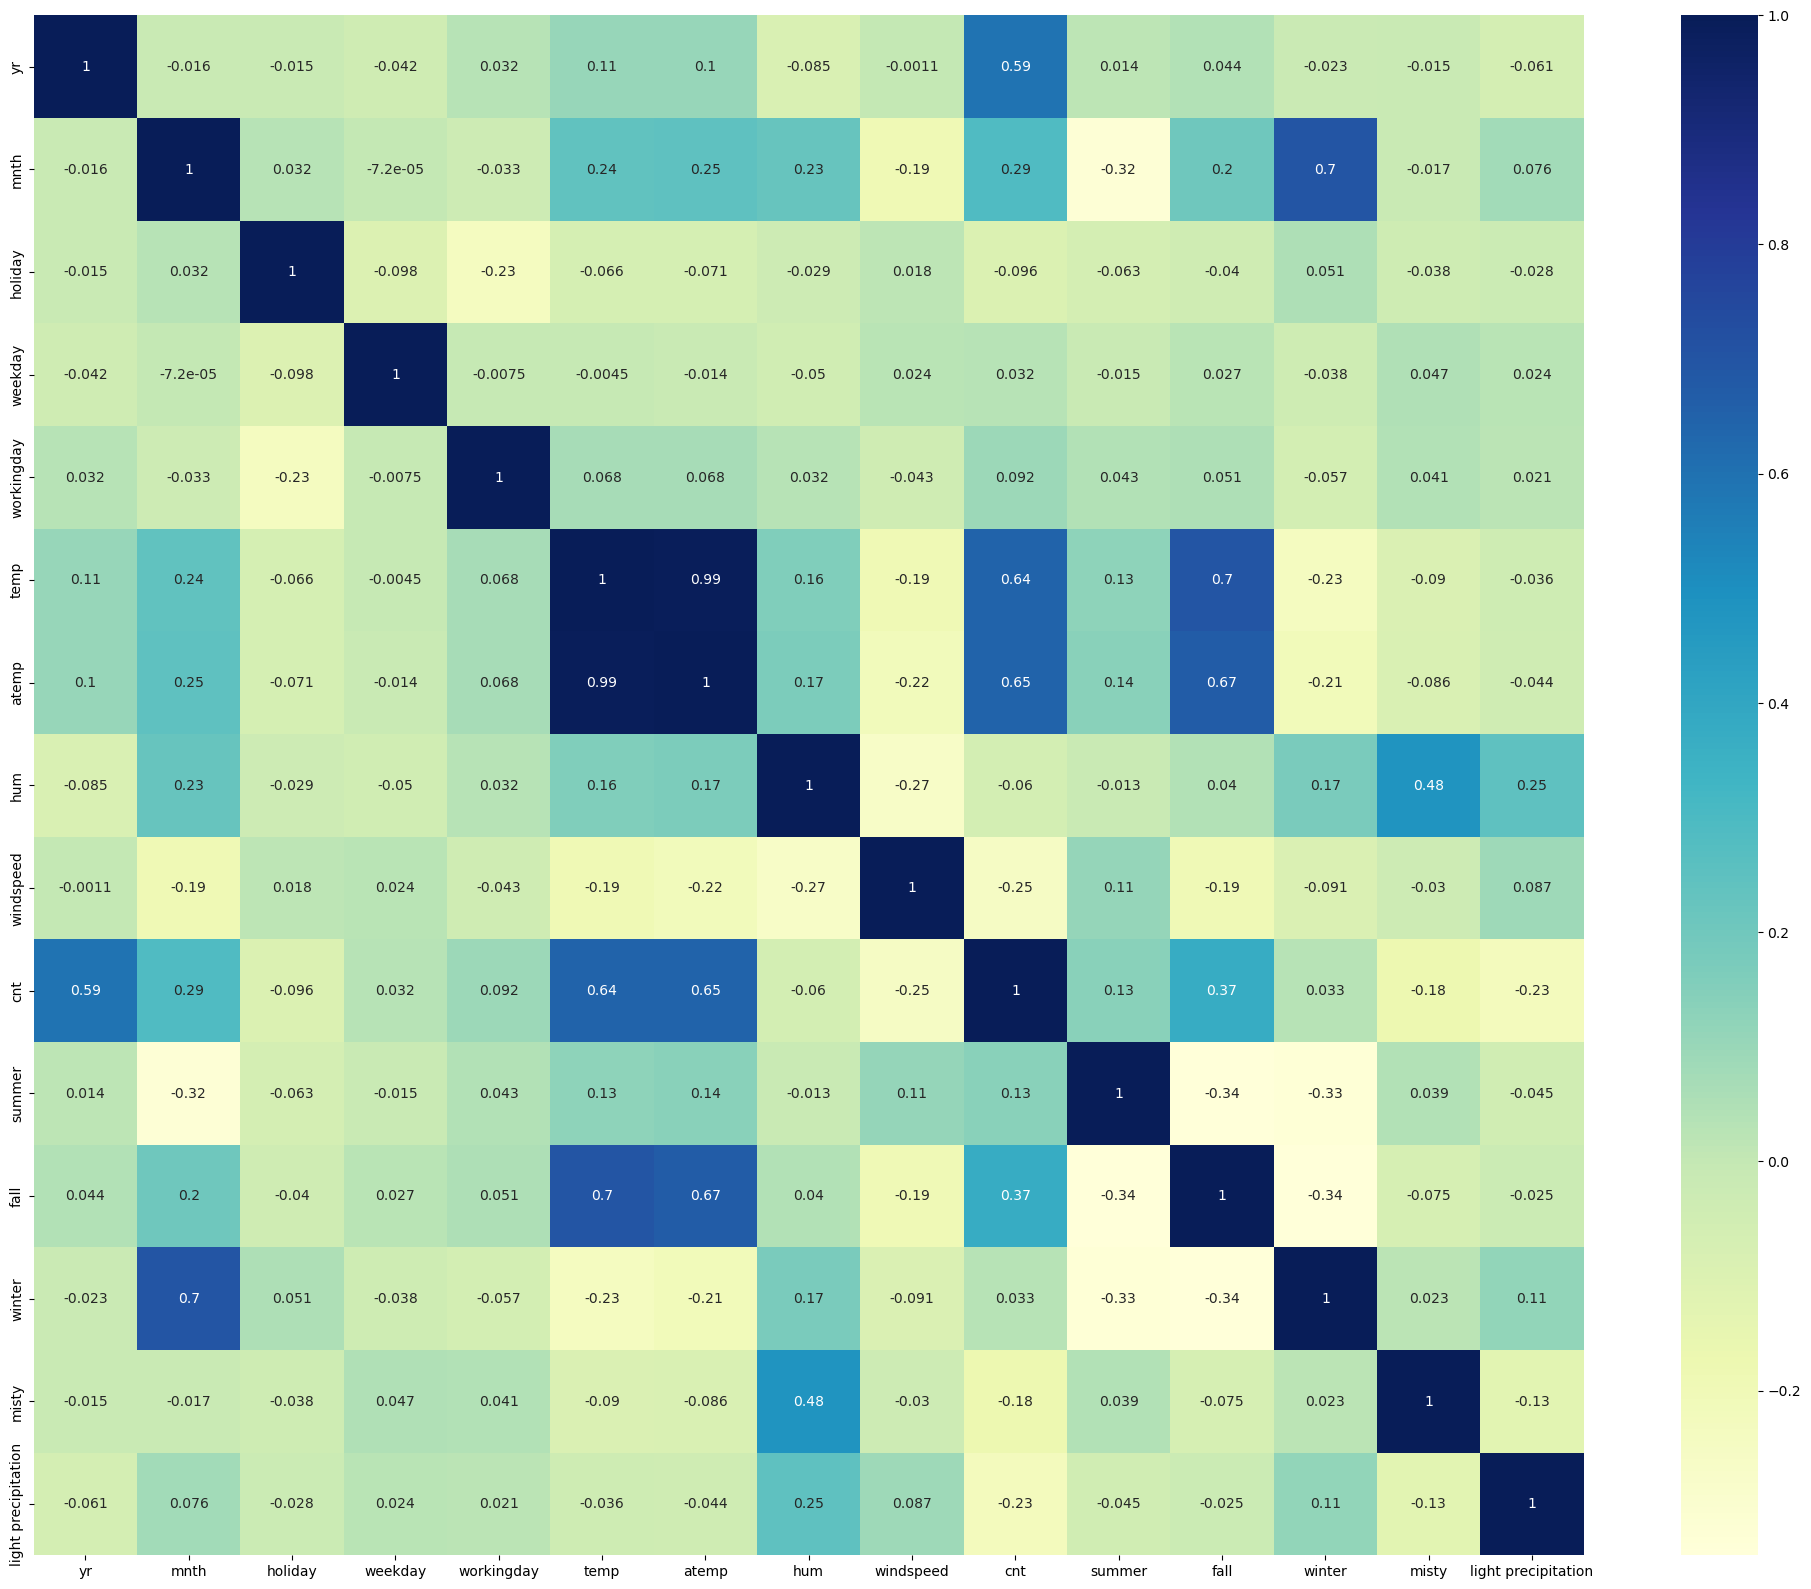

In [487]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot= True, cmap='YlGnBu')
plt.show()

### Dividing into X and Y sets for the model building

In [488]:
y_train = df_train.pop('cnt')
X_train = df_train

In [489]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,misty,light precipitation
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0,0,0,1,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0


In [490]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [491]:
# Running RFE with the output number of variables equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)

In [492]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 3),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('misty', True, 1),
 ('light precipitation', True, 1)]

In [493]:
# Remove columns using rfe.support_
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'misty', 'light precipitation'],
      dtype='object')

In [494]:
# List removed columns
X_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday', 'atemp'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [495]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [496]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [497]:
lm = sm.OLS(y_train, X_train_rfe).fit() # Running the linear model

In [498]:
# Let's see the summary of the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          4.78e-183
Time:                        22:56:33   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2178      0.028      7.788      0.000       0.163       0.273
yr                      0.2307      0.008     27.186      0.000       0.214       0.247
holiday                -0.0865      0.027     -3.245      0.001      -0.139      -0.034
temp                    0.4961      0.035     14.324      0.000       0.428       0.564
hum                    -0.1390      0.039     -3.548      0.000      -0.216      -0.062
windspeed              -0.1827      0.027     -6.794      0.000      -0.236      -0.130
summer                  0.1168      0.015      7.554      0.000       0.086       0.147
fall                    0.0746      0.021      3.597      0.000       0.034       0.115
winter                  0.1630      0.013     12.350      0.000       0.137       0.189
misty                  -0.0537      0.011     -4.889      0.000      -0.075      -0.032
light precipitation    -0.2409      0.028     -8.751      0.000      -0.295      -0.187
==============================================================================
Omnibus:                       64.105   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.041
Skew:                          -0.644   Prob(JB):                     1.07e-35
Kurtosis:                       5.433   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""